# Red Wine Quality Analysis and Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
#loding dataset in pandas dataframe

data = pd.read_csv('C:\\Users\\Gaurav Mukherjee\\Documents\\datasets\\winequality.csv')

In [3]:
#check first five rows of the dataset
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [4]:
#check last five rows of the dataset
data.tail()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
6492  red            6.2             0.600         0.08             2.0   
6493  red            5.9             0.550         0.10             2.2   
6494  red            6.3             0.510         0.13             2.3   
6495  red            5.9             0.645         0.12             2.0   
6496  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6

In [5]:
#check shape of the dataset
data.shape

(6497, 13)

In [6]:
#check infomation of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
#check columns of the dataset
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [8]:
#check mathamatic describe
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [9]:
#check coreation of the dataset
data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.220172     0.323736   
volatile acidity           0.220172          1.000000    -0.378061   
citric acid                0.323736         -0.378061     1.000000   
residual sugar            -0.112319         -0.196702     0.142486   
chlorides                  0.298421          0.377167     0.039315   
free sulfur dioxide       -0.283317         -0.353230     0.133437   
total sulfur dioxide      -0.329747         -0.414928     0.195218   
density                    0.459204          0.271193     0.096320   
pH                        -0.251814          0.260660    -0.328689   
sulphates                  0.300380          0.225476     0.057613   
alcohol                   -0.095603         -0.038248    -0.010433   
quality                   -0.077031         -0.265953     0.085706   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.112319   0.298421            -0.283317   
volatile acidity           -0.196702   0.377167            -0.353230   
citric acid                 0.142486   0.039315             0.133437   
residual sugar              1.000000  -0.128902             0.403439   
chlorides                  -0.128902   1.000000            -0.195042   
free sulfur dioxide         0.403439  -0.195042             1.000000   
total sulfur dioxide        0.495820  -0.279580             0.720934   
density                     0.552498   0.362594             0.025717   
pH                         -0.267050   0.044806            -0.145191   
sulphates                  -0.185745   0.395332            -0.188489   
alcohol                    -0.359706  -0.256861            -0.179838   
quality                    -0.036825  -0.200886             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329747  0.459204 -0.251814   0.300380   
volatile acidity                 -0.414928  0.271193  0.260660   0.225476   
citric acid                       0.195218  0.096320 -0.328689   0.057613   
residual sugar                    0.495820  0.552498 -0.267050  -0.185745   
chlorides                        -0.279580  0.362594  0.044806   0.395332   
free sulfur dioxide               0.720934  0.025717 -0.145191  -0.188489   
total sulfur dioxide              1.000000  0.032395 -0.237687  -0.275381   
density                           0.032395  1.000000  0.011920   0.259454   
pH                               -0.237687  0.011920  1.000000   0.191248   
sulphates                        -0.275381  0.259454  0.191248   1.000000   
alcohol                          -0.265740 -0.686745  0.121002  -0.003261   
quality                          -0.041385 -0.305858  0.019366   0.038729   

                       alcohol   quality  
fixed acidity        -0.095603 -0.077031  
volatile acidity     -0.038248 -0.265953  
citric acid          -0.010433  0.085706  
residual sugar       -0.359706 -0.036825  
chlorides            -0.256861 -0.200886  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121002  0.019366  
sulphates            -0.003261  0.038729  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

In [10]:
#check missing value of the dataset
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
#check duplicated value
data.duplicated().sum()

1168

# EDA of the Dataset

In [12]:
#count the value of type
data['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

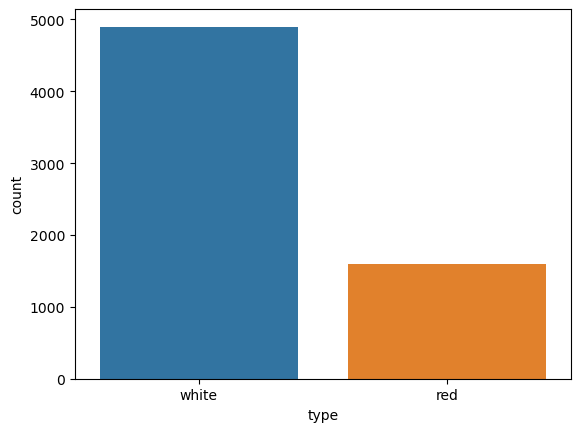

In [13]:
#plot conutplot
sns.countplot(data['type'])

<AxesSubplot:ylabel='type'>

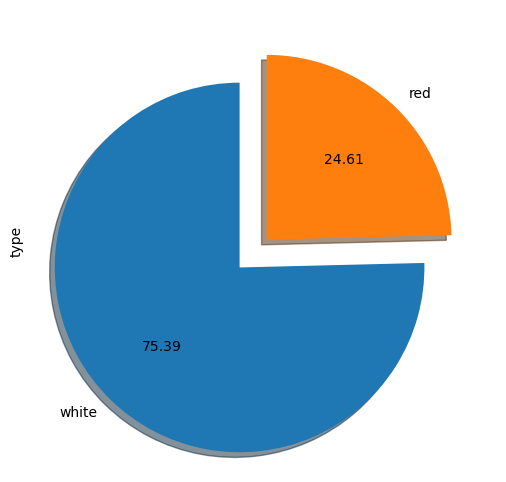

In [14]:
#plot pie plot
plt.figure(figsize=(15,6))
explode= [0.2, 0.01]
data['type'].value_counts().plot(kind='pie',autopct='%.2f',explode= explode, shadow='True', startangle=90)


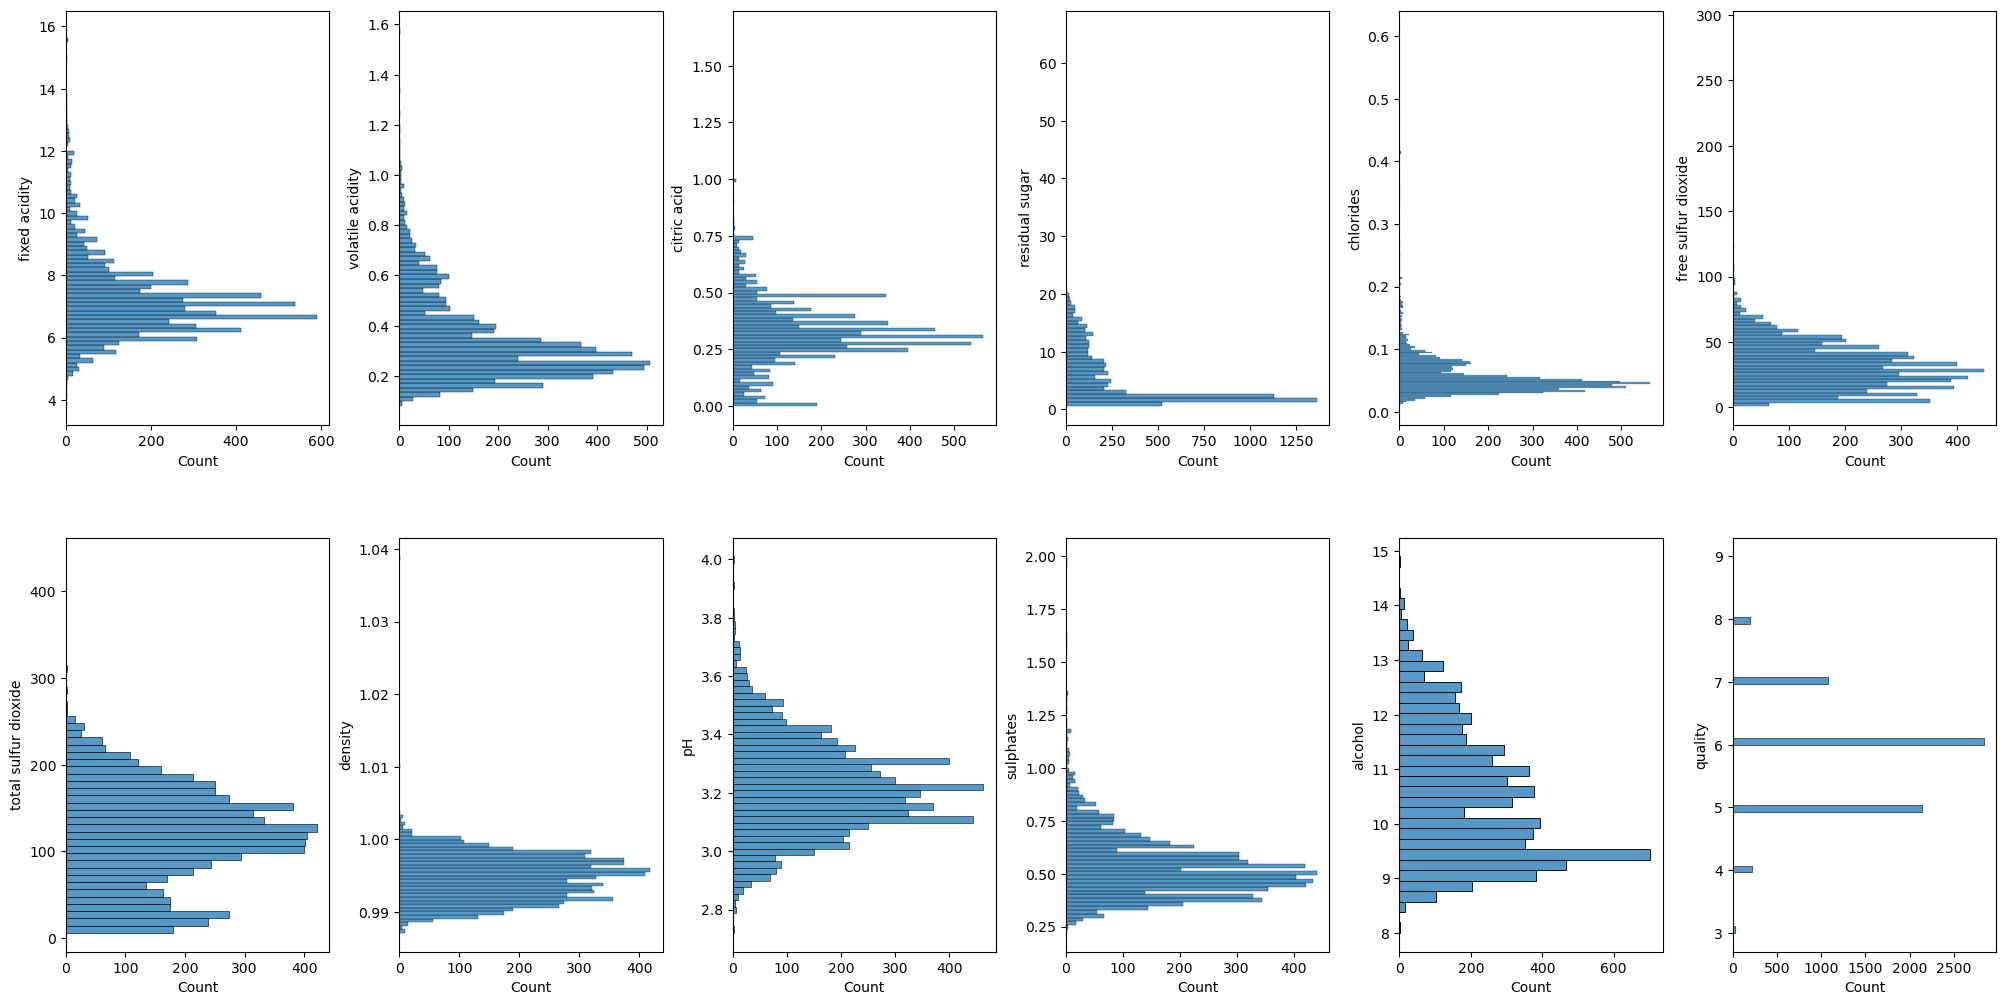

In [15]:
# create histplot plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in data.items():
    if col != 'type':
        sns.histplot(y=col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

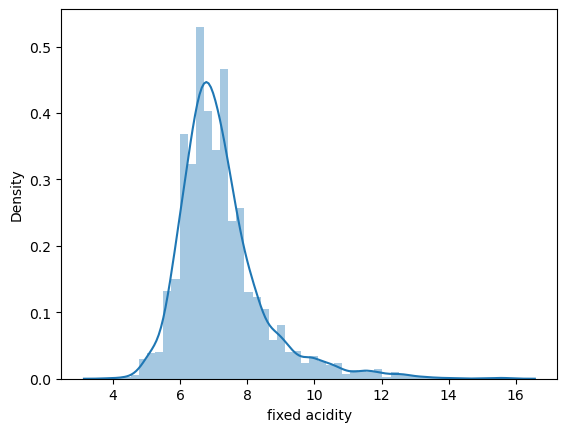

In [16]:
#distplot for fixed acidity
sns.distplot(data['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

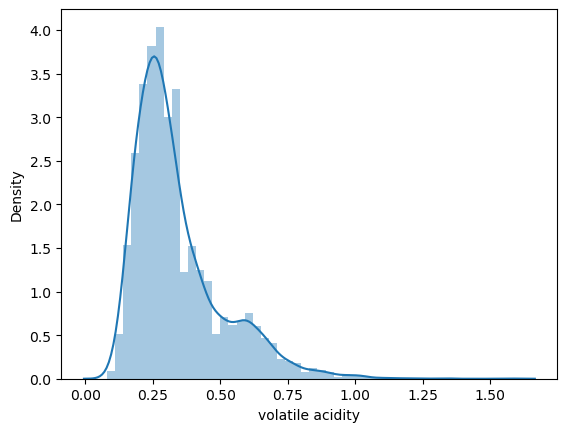

In [17]:
#distplot for volatile acidity
sns.distplot(data['volatile acidity'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

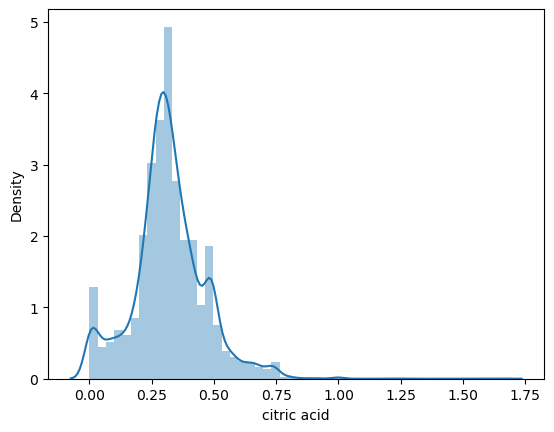

In [18]:
#distplot for citric acid
sns.distplot(data['citric acid'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

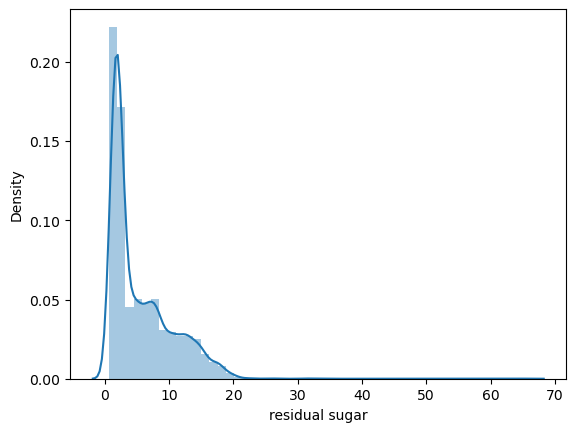

In [19]:
#distplot for residual sugar
sns.distplot(data['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

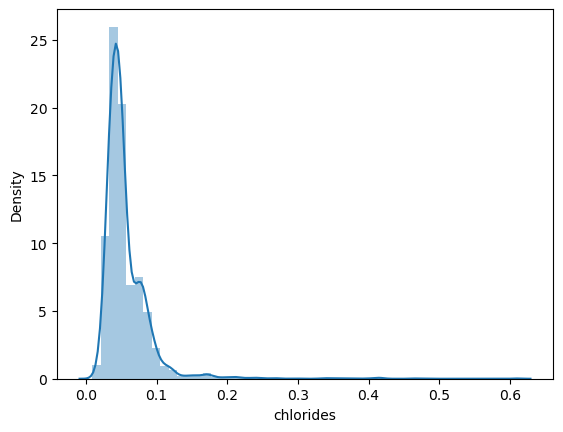

In [20]:
#distplot for chlorides
sns.distplot(data['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

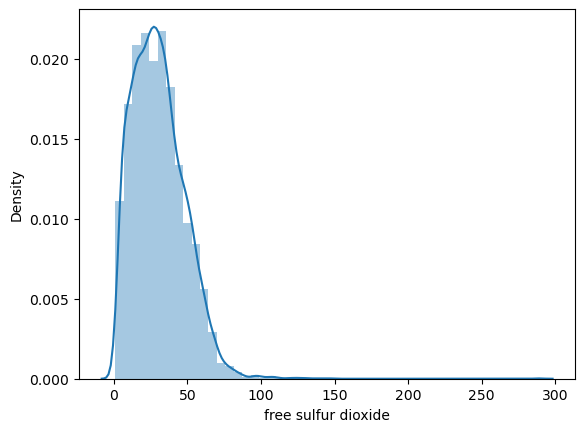

In [21]:
#distplot for free sulfur dioxide
sns.distplot(data['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

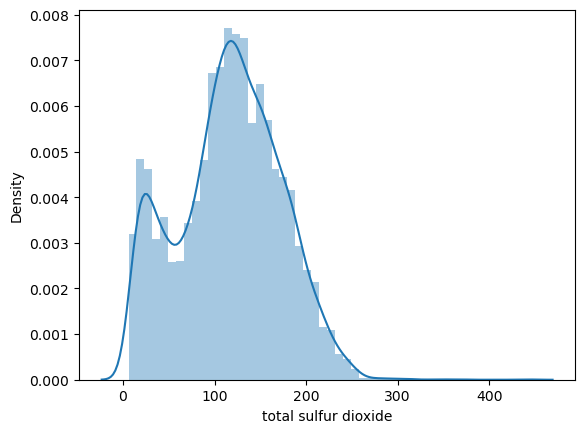

In [22]:
#distplot for total sulfur dioxide
sns.distplot(data['total sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

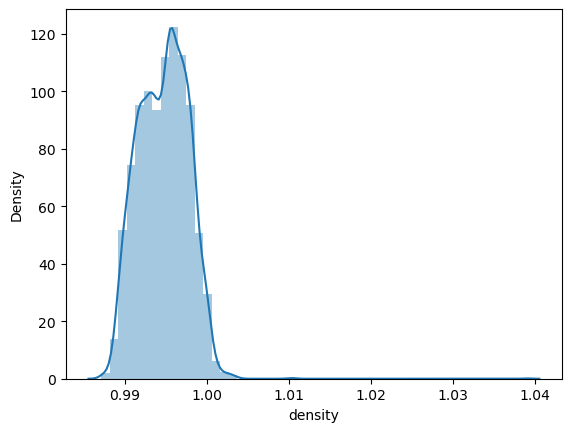

In [23]:
#distplot for density
sns.distplot(data['density'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

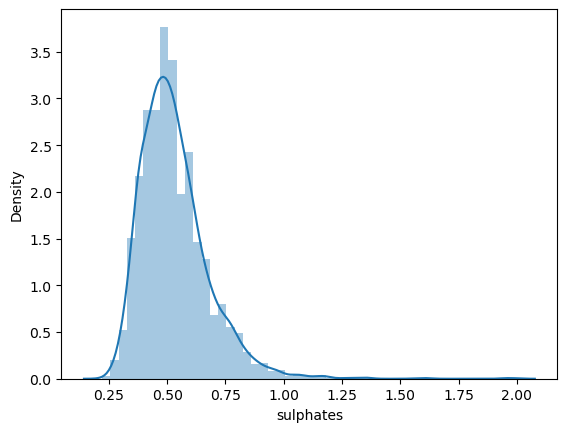

In [24]:
#distplot for sulphates
sns.distplot(data['sulphates'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

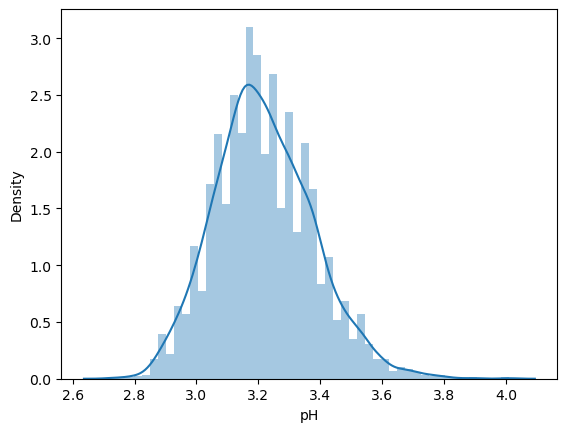

In [25]:
#distplot for PH
sns.distplot(data['pH'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

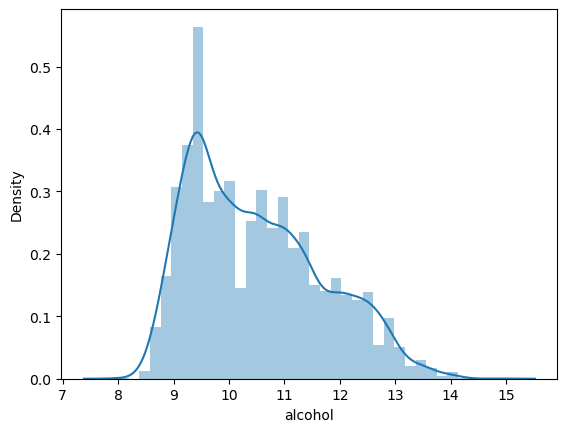

In [26]:
#distplot for alcohol
sns.distplot(data['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='Density'>

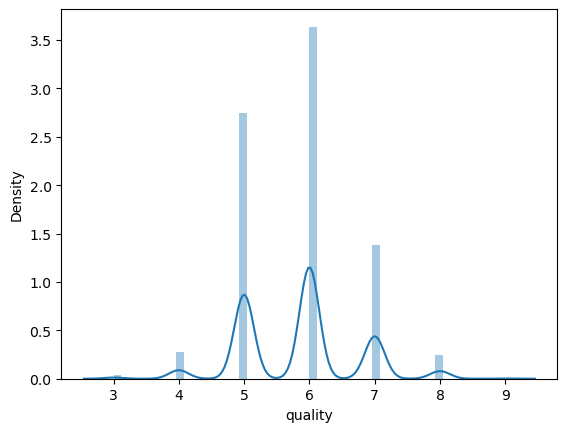

In [27]:
#distplot for quality
sns.distplot(data['quality'])

In [28]:
#count the value quality
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

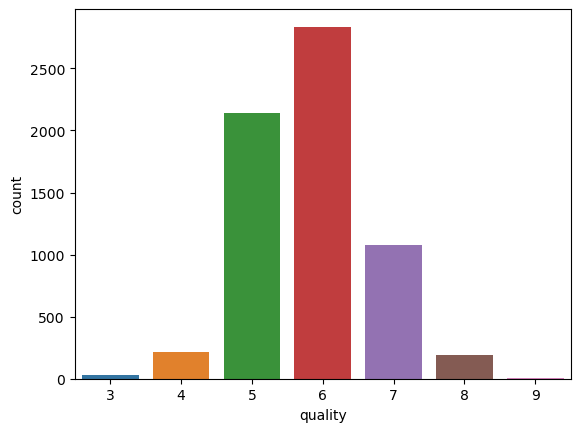

In [29]:
#countplot value quality
sns.countplot(data['quality'])

<AxesSubplot:ylabel='quality'>

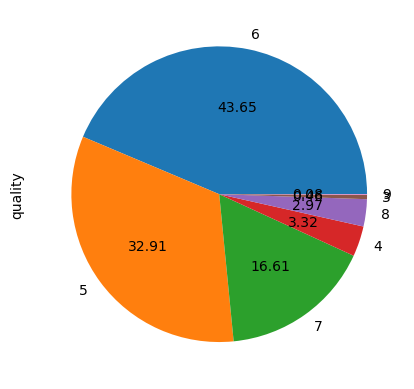

In [30]:
#plot pie plot

data['quality'].value_counts().plot(kind='pie',autopct='%.2f')

In [31]:
# log transformation
data['free sulfur dioxide'] = np.log(1 + data['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

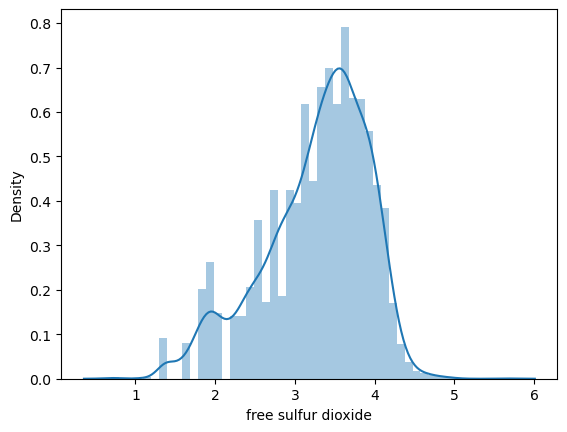

In [32]:
sns.distplot(data['free sulfur dioxide'])

<AxesSubplot:>

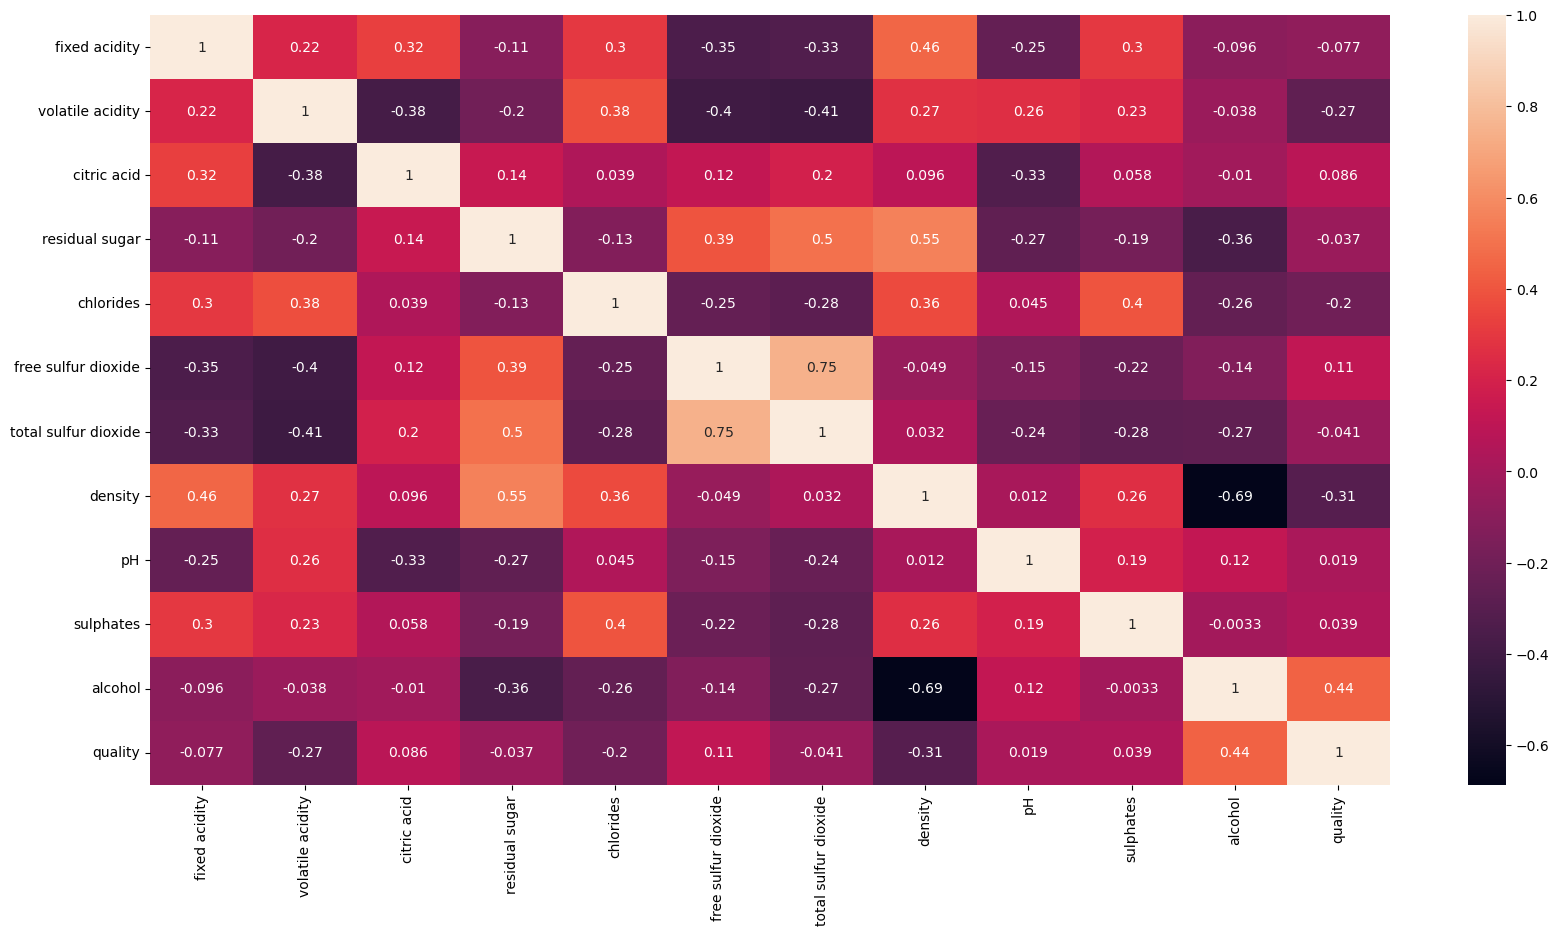

In [33]:
#correaction of the dataset
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

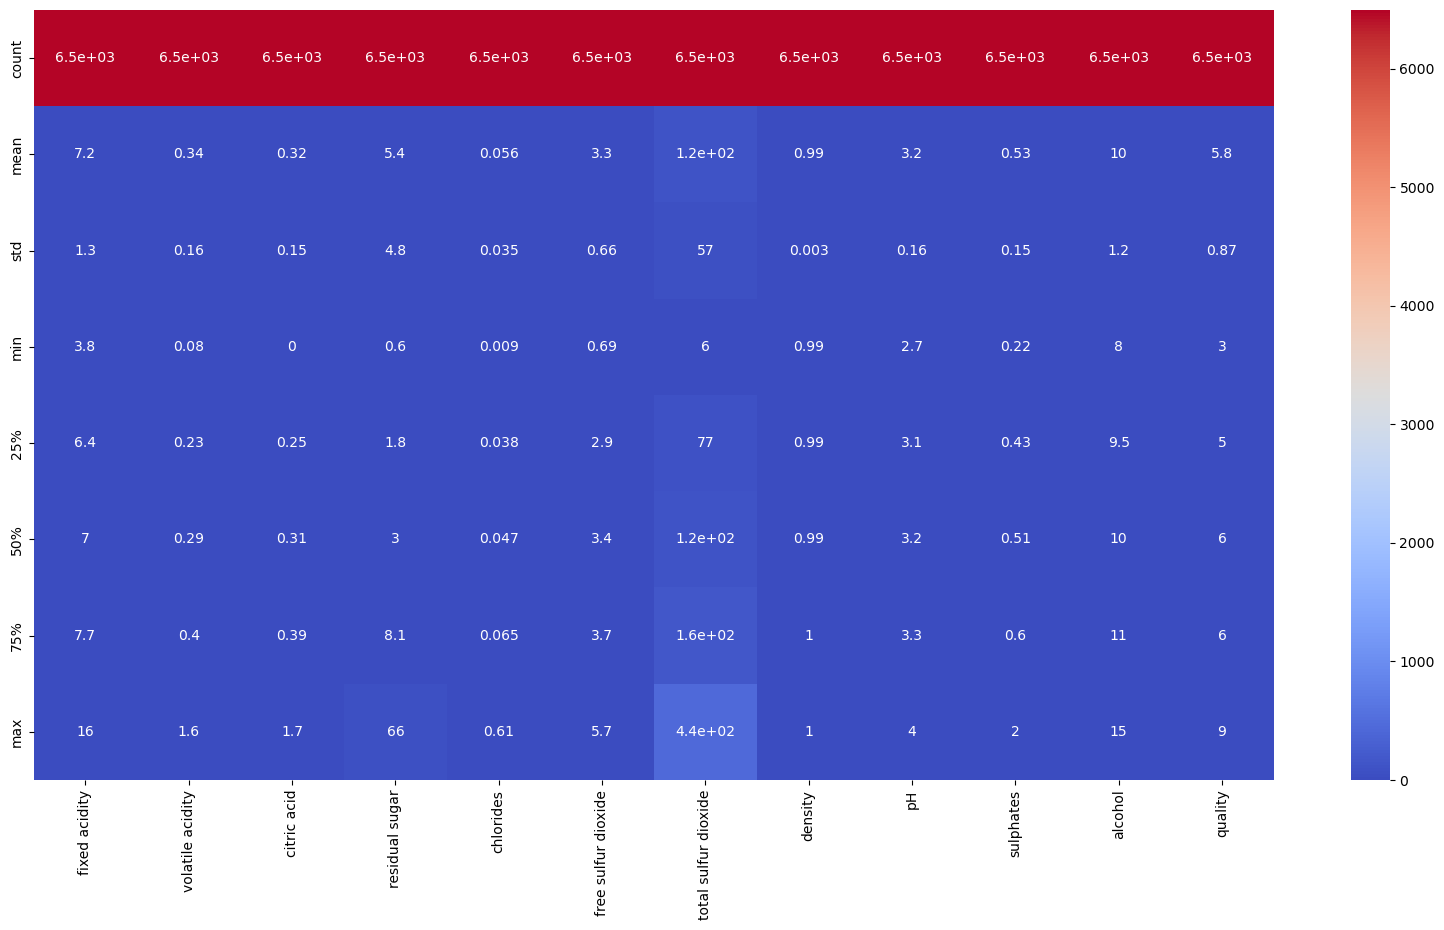

In [34]:
desc = data.describe()
plt.figure(figsize=(20,10))
sns.heatmap(desc, annot=True, cmap='coolwarm')

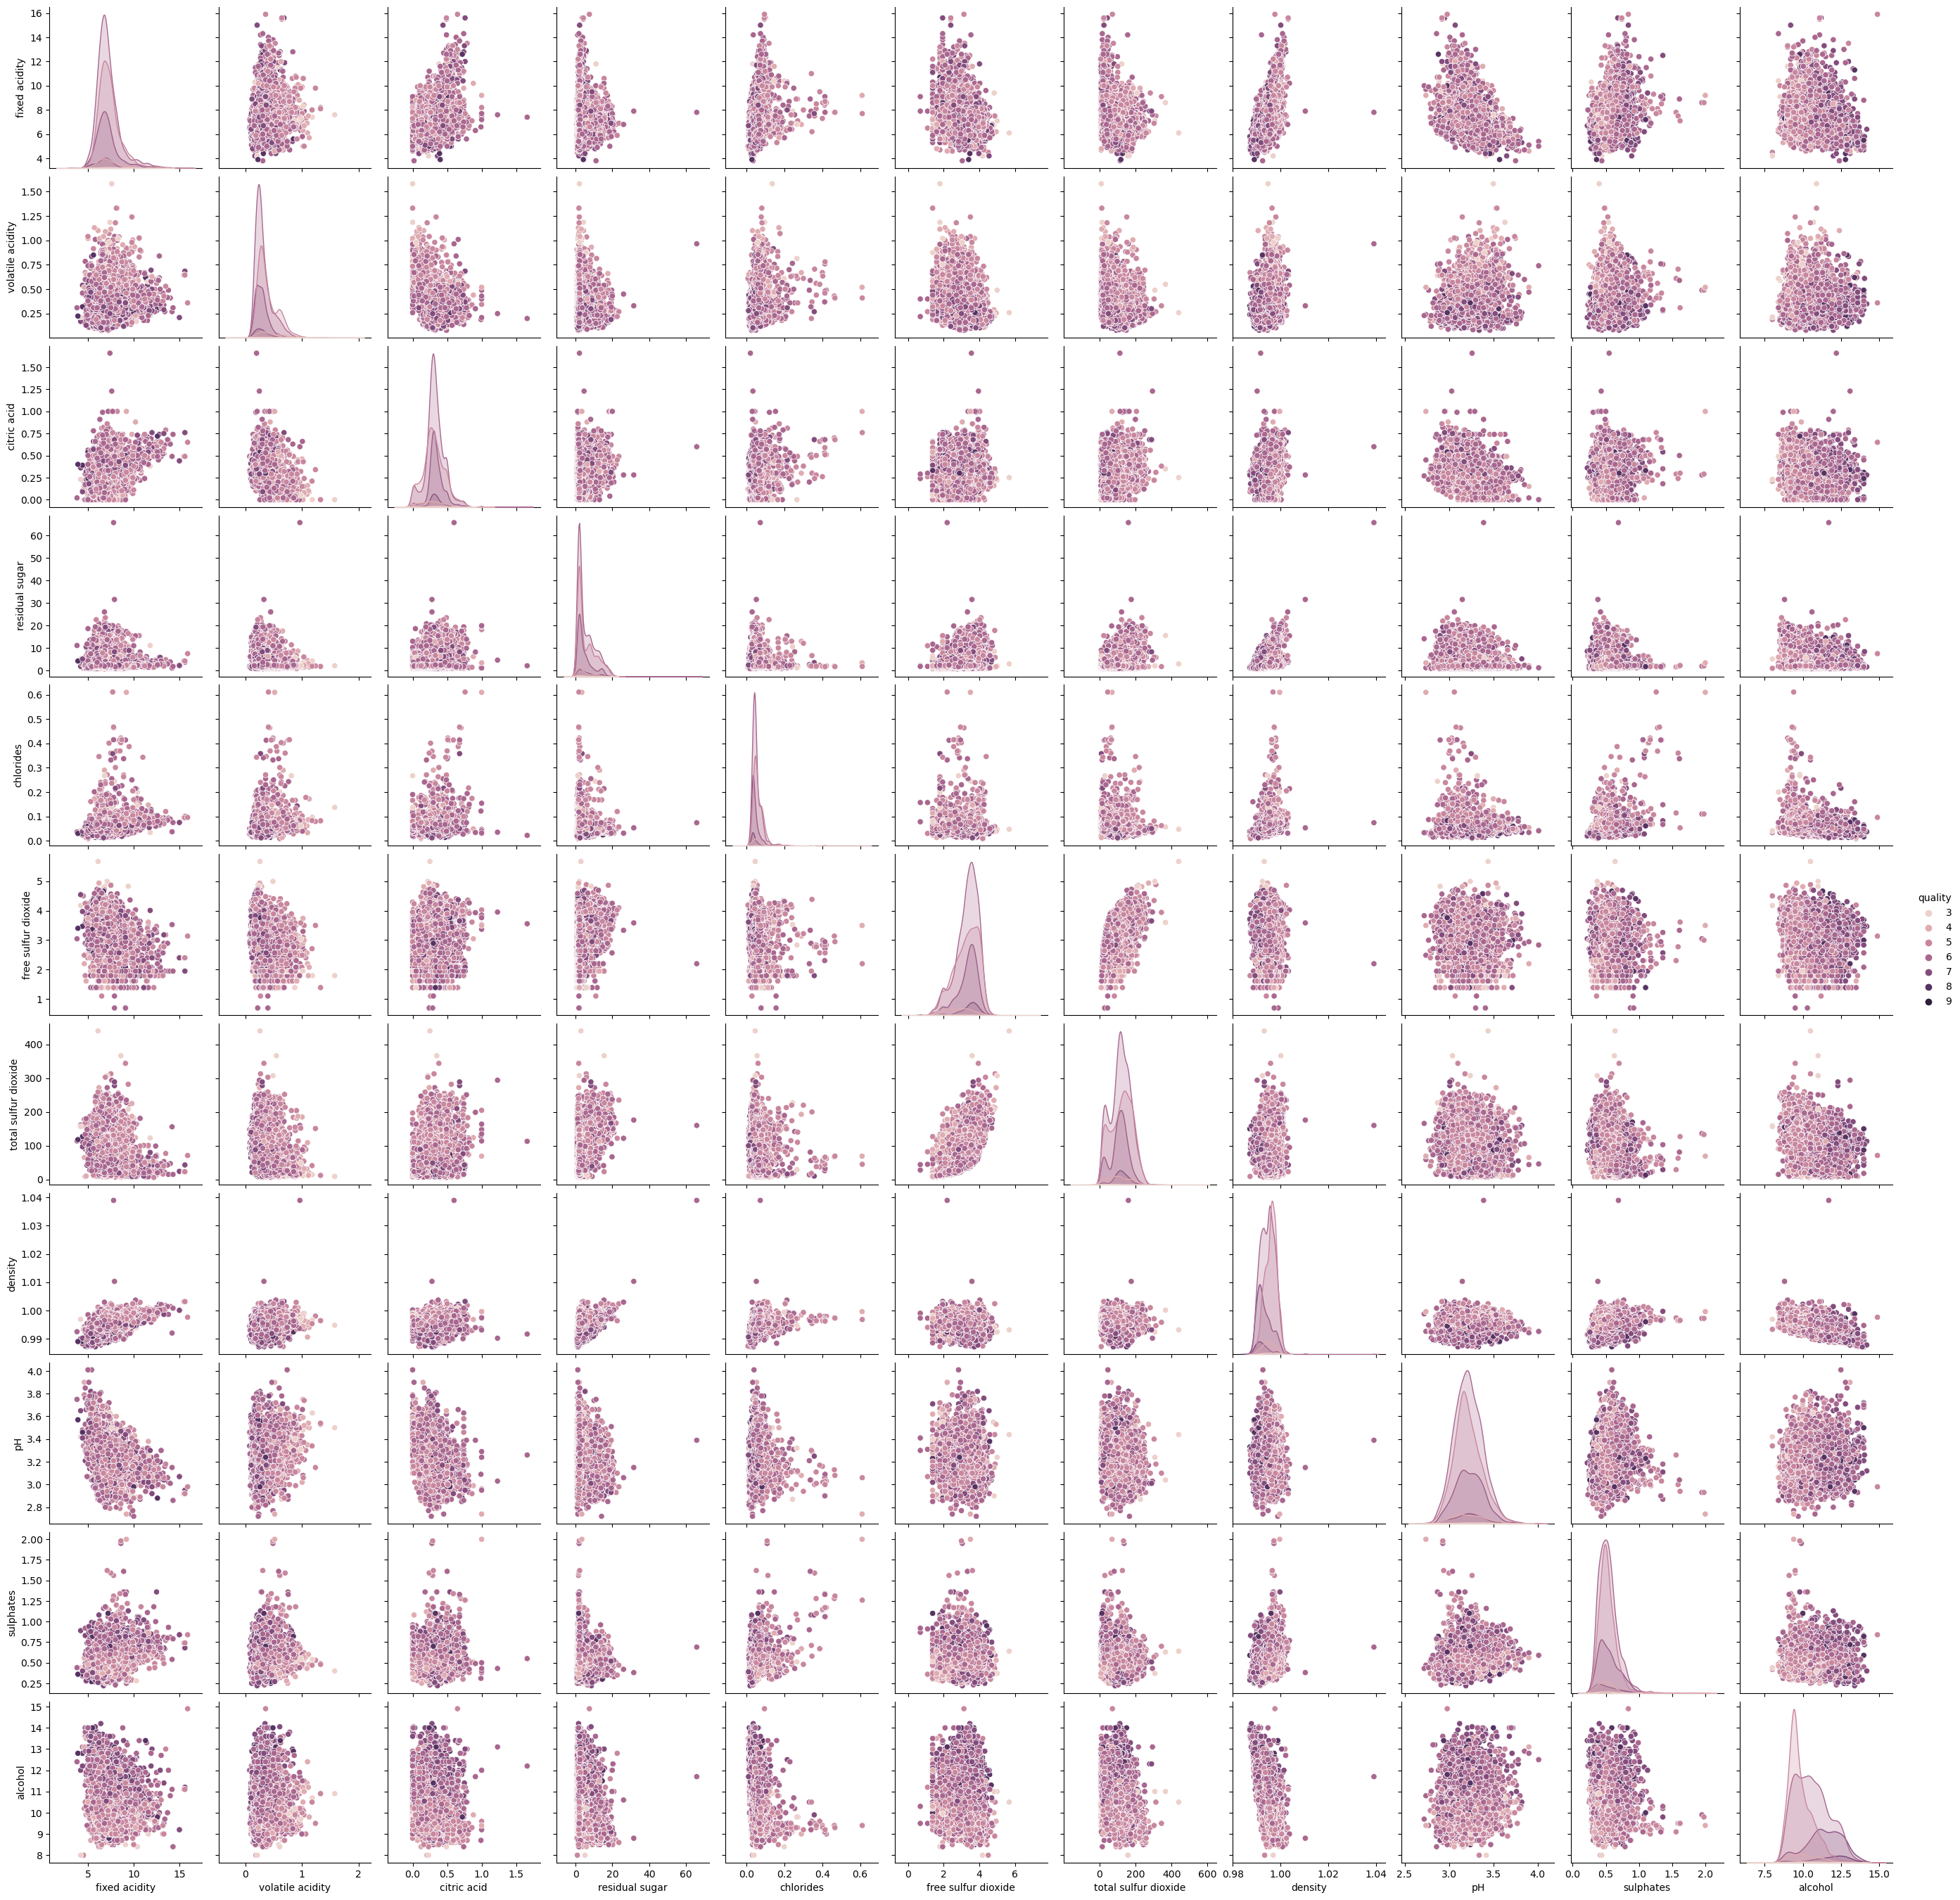

In [35]:
#pairplot of the dataset
sns.pairplot(data,hue='quality')

In [36]:
# fill the missing values
for col, value in data.items():
    if col != 'type':
        data[col] = data[col].fillna(data[col].mean())

In [37]:
#after fill missing value check missing value
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Machine Learning 

In [38]:
#spliting the dataset in X and Y
X = data.drop(columns=['type', 'quality'])
Y = data['quality']
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [39]:
Y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversample= SMOTE(k_neighbours=4)

#transform the dataset
X, Y = oversample.fit_resample(X, Y)


In [41]:
Y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [42]:
#splitting the dataset in X_train and Y_train

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
#split the data to tain and test
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, train_size= 0.8)

In [44]:
#print X_train and Y_train
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5197, 11) (1300, 11) (5197,) (1300,)


In [45]:
#using  standardscaler

scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)

# Model Training

In [47]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X_train, Y_train):
    # train the model
    model.fit(X_train, Y_train)
    print("Accuracy:", model.score(X_test, Y_test) * 100)
    # cross-validation
    score = cross_val_score(model, X_train, Y_train, cv=5)
    print("CV Score:", np.mean(score)*100)

In [48]:
#using LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X_train, Y_train)

Accuracy: 0.6923076923076923
CV Score: 54.05060339083438


In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X_train, Y_train)

Accuracy: 16.692307692307693
CV Score: 57.68666247131118


In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X_train, Y_train)

Accuracy: 42.769230769230774
CV Score: 66.59574664988523


In [51]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X_train, Y_train)

Accuracy: 42.769230769230774
CV Score: 67.11536610646331
